# ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Obteniendo los datos relevantes

El cliente ha solicitado un análisis de la relación accidentes-área de los distritos. Los datos del municipio se almacenan en un archivo JSON en la carpeta ```datos```.

### Question (5 min):

Utilice la función ```json.load()``` para cargar el archivo ```borough_data.json``` como diccionario.

**Answer.** 

In [3]:
with open('borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

### Question (5 min):
De manera similar, use la función pandas ```read_csv()``` para cargar el archivo ```accidentes.csv``` como un DataFrame. Nombra este DataFrame ```df```.


**Answer.** 

In [5]:
with open('accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')
type(df)

pandas.core.frame.DataFrame

In [6]:
df=pd.read_csv('accidents.csv',delimiter=";")
type(df)

pandas.core.frame.DataFrame

## Overview de la data

Analizemos las columnas presentes en el data frame

In [7]:
df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [8]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Tenemos las siguientes columnas

1. **BOROUGH**: el municipio en el que ocurrió el accidente
2. **COLLISION_ID**: un identificador único para esta colisión
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Motivos del accidente
4. **CROSS STREET NAME**: Calle transversal más cercana al lugar del accidente
5. **DATE**: Fecha del accidente
6. **TIME**: Hora del accidente
7. **LATITUDE**: Latitud del accidente
8. **LONGITUDE**: Longitud del accidente
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Lesión por categoría
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS**: Categoría muerte sabia
11. **ON STREET NAME**: Calle donde ocurrió el accidente
13. **VEHICLE TYPE CODE(1, 2, 3, 4, 5)**: Tipos de vehículos involucrados en el accidente
14. **ZIP CODE**: código postal del lugar del accidente

### Exercise 1 (30 min):

Desde 2014, la ciudad de Nueva York ha estado implementando un plan de seguridad vial llamado [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). Su objetivo es reducir el número de muertes por accidentes de tránsito a *cero* para fines de 2024. El plan está creando nuevas y mejorando las medidas de seguridad actuales, algunas de ellas incluyen:

- [ ] Detección de peatones automatizada
- [ ] Auditorías de seguridad vial en lugares de alto riesgo
- [ ] Ampliación de la red de carriles bici
- [ ] Iniciativas específicas de educación y sensibilización
- [ ] Creación de islas de refugio peatonal
- [ ] Lanzamiento del programa integrado de reductor de velocidad basado en datos (topes y amortiguadores de velocidad)

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? Marque todo lo que corresponda.

**Nota:** Puede crear marcas de verificación haciendo doble clic en esta celda y agregando una ```[x]``` en las líneas correspondientes.

**Answer.**

- [ ] Automated pedestrian detection

The data provided contains the exact location, the number of pedestrians injured/killed, and the contributing factor of the vehicles in each accident. We could study the accidents where pedestrians were injured or killed. This *could* help to place cameras at important spots, where the automatic detection may be needed. However, for the *implementation* of automated pedestrian detection, a data set of images of crosswalks and intersections is more crucial.

- [x] Road safety audits at high risk locations

As discussed, our data can help with the recognition of problematic spots. We can check the street names where a high number of accidents have occured in the past, then inspect the area to see what extra measures should be implemented. 

- [ ] Expansion in the cycle track network

Our data contains the number of cyclists injured/killed. We could determine the spots where these are happening the most and then improve the safety measures around the area. However, we would need more data to determine if these locations have a high volume of cyclists. Thus the data may not be that beneficial for making decisions on expanding the cycle network.

- [x] Targeted education and awareness initiatives

The data provides the contributing factor of the accidents along with the type of vehicles that were involved in them. We can then study which types of vehicles cause the most number of accidents and organize educational initiatives around this.

- [ ] Creation of pedestrian refuge islands

Pedestrian islands are usually created on streets that are very wide. Thus, the information provided might not be that beneficial for this initiative, as we do not have information on the width/size of streets.

- [x] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)

One of the contributing factors in accidents provided in the data is speeding. We can check if these accidents occur in highly transited areas. Thus, our data might be useful for the implementation of this initiative.

Sigamos adelante y respondamos a cada una de las preguntas del cliente.

## Respondiendo las preguntas del cliente 

### Exercise 2 (30 min):

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.

**Answer.** 

<AxesSubplot:xlabel='DATE'>

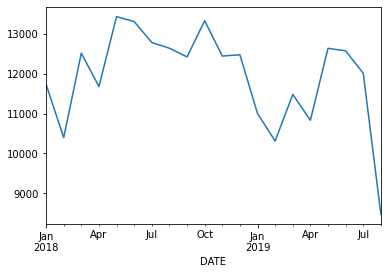

In [9]:
df['DATE']=pd.to_datetime(df['DATE']) # Formato datetime python 
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()

<AxesSubplot:xlabel='DATE'>

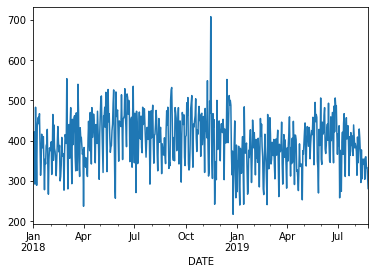

In [10]:
#df['DATE']=pd.to_datetime(df['DATE'])
#monthly_accidents = df.groupby(df['DATE'].dt.to_period('M')).size()
#monthly_accidents.plot.line()

monthly_accidents1 = df.groupby(df['DATE'].dt.to_period('D')).size()
monthly_accidents1.plot.line()


In [11]:
type(monthly_accidents)

pandas.core.series.Series

In [12]:
max(df['DATE']) 

Timestamp('2019-08-24 00:00:00')

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

### Exercise 3 (15 min):

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Answer.** 

Notamos que agosto de 2019 es el mes con el menor número de accidentes, pero esto probablemente se deba al hecho de que no hay un registro completo para este mes: ```max(df['DATE']) = Timestamp('2019-08-24 00:00:00') ```. Es decir, falta toda la última semana de datos.

Sin tener en cuenta este mes, la menor cantidad de accidentes parece ocurrir en febrero. Este es el mes del año con las temperaturas más bajas y las condiciones de la carretera pueden complicarse un poco. Por lo tanto, las personas pueden preferir usar el transporte público y evitar salir tanto como sea posible debido al clima frío. Esto contrasta con el verano, donde las personas tienden a salir y pueden ocurrir más accidentes.

### Exercise 4 (30 min):
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

**Answer.**

Text(0, 0.5, 'Total de accidentes')

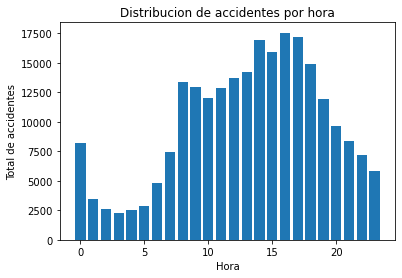

In [13]:
df['TIME']=pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour
hourly_accidents =df.groupby('HOUR').size()
hourly_accidents.index
hourly_accidents.values
plt.bar(hourly_accidents.index,hourly_accidents.values)
plt.title('Distribucion de accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')

Text(0, 0.5, 'Total de accidentes')

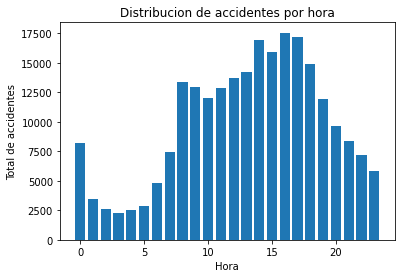

In [ ]:
#Firt change the format of the TIME column
df['TIME']=pd.to_datetime(df['TIME'])

# Create a new hour column 
df['HOUR'] = df['TIME'].dt.hour

# Find out how the number of accidents varies across hours. 
hourly_accidents = df.groupby('HOUR').size()
hourly_accidents.index
hourly_accidents.values
plt.bar(hourly_accidents.index,hourly_accidents.values)
plt.title('Distribucion de accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')
#hourly_accidents.plot.bar()

Text(0, 0.5, 'Total de accidentes')

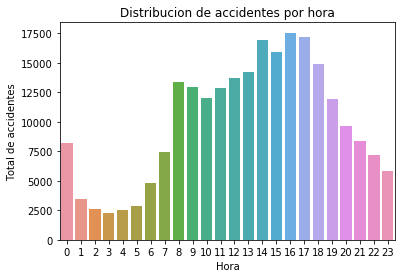

In [ ]:
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Distribucion de accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')

A partir de esto, vemos que ocurren más accidentes en la tarde (2 - 6 PM) que en otros momentos del día.

### Exercise 5 (15 min):

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Answer.** 

La agregación de datos será un problema si las variables ignoradas exhiben grandes grados de variación y no se distribuyen de manera muy uniforme. Puede darse el caso de que la concentración de accidentes en algunas zonas de la ciudad ocurra en diferentes momentos del día, pero al agregar los datos podemos concluir falsamente que los accidentes son constantes en toda la ciudad. Probablemente, las zonas residenciales estén ocupadas entre las 5 y las 7 p. M., Pero las zonas comerciales o de fabricación pueden estar ocupadas entre las 3 y las 5 p. M. Esta información es importante si el cliente está interesado en diseñar un plan de implementación para que los oficiales de policía litiguen accidentes de tráfico, pero se perderá si agregamos todos los lugares en los que ocurrieron.

### Exercise 6 (15 min):

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Answer.**

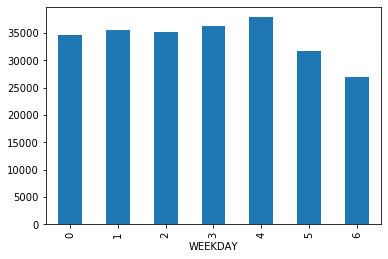

In [ ]:
df['WEEKDAY'] = df['DATE'].dt.weekday
weekday_accidents=df.groupby('WEEKDAY').size()
weekday_accidents.plot.bar()

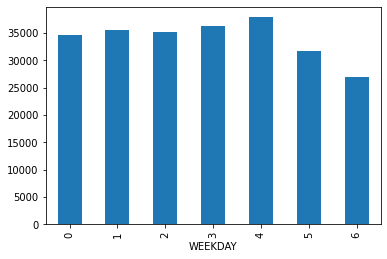

In [ ]:
df['WEEKDAY'] = df['DATE'].dt.weekday
weekday_accidents = df.groupby('WEEKDAY').size()
weekday_accidents.plot.bar()

Hay relativamente menos accidentes los fines de semana que entre semana.

### Exercise 7 (30 min):

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Answer.**

In [ ]:
df.groupby('BOROUGH').size()

BOROUGH
BRONX            37709
BROOKLYN         76253
MANHATTAN        48749
QUEENS           67120
STATEN ISLAND     8691
dtype: int64

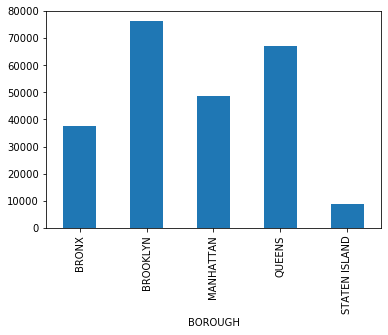

In [ ]:
boroughs = df.groupby('BOROUGH').size()
boroughs.plot.bar()

In [ ]:
boroughs

BOROUGH
BRONX            37709
BROOKLYN         76253
MANHATTAN        48749
QUEENS           67120
STATEN ISLAND     8691
dtype: int64

In [ ]:
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

In [ ]:
# Update keys in borough data
print(borough_data.keys())
print(df['BOROUGH'].unique())

# Since there are differences in the text used in the data and Wikipedia data, let's update it
borough_data['bronx'] = borough_data.pop('the bronx')


dict_keys(['the bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'])
['BRONX' 'BROOKLYN' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND']


In [ ]:
borough_frame = pd.DataFrame(boroughs)
borough_frame.columns = ['count']
borough_frame['borough'] = borough_frame.index
borough_frame['accidents_per_sq_mi'] = borough_frame.apply(lambda x: x['count']/borough_data[x['borough'].lower()]['area'], axis=1)
borough_frame

,count,borough,accidents_per_sq_mi
BOROUGH,,,
BRONX,37709,BRONX,895.700713
BROOKLYN,76253,BROOKLYN,1076.715617
MANHATTAN,48749,MANHATTAN,2135.304424
QUEENS,67120,QUEENS,618.446512
STATEN ISLAND,8691,STATEN ISLAND,148.894980


In [ ]:
borough_frame = pd.DataFrame(boroughs)
borough_frame.columns = ['count']
borough_frame['borough'] = borough_frame.index
borough_frame['accidents_per_sq_mi'] = borough_frame.apply(lambda x: x['count'] / borough_data[x['borough'].lower()]['area'], axis=1)
borough_frame

,count,borough,accidents_per_sq_mi
BOROUGH,,,
BRONX,37709,BRONX,895.700713
BROOKLYN,76253,BROOKLYN,1076.715617
MANHATTAN,48749,MANHATTAN,2135.304424
QUEENS,67120,QUEENS,618.446512
STATEN ISLAND,8691,STATEN ISLAND,148.894980


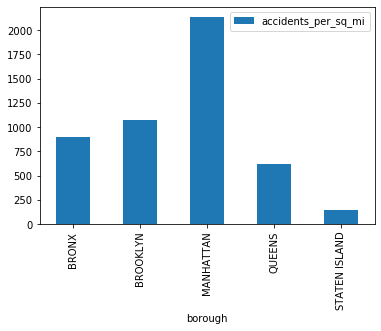

In [ ]:
borough_frame.plot.bar(x='borough', y='accidents_per_sq_mi')

Ahora tenemos las claves para hacer coincidir el diccionario y el marco de datos. La diferencia entre mayúsculas y minúsculas se puede manejar haciendo que la acción de mapeo no distinga entre mayúsculas y minúsculas. Esto se puede hacer convirtiendo las claves del diccionario a mayúsculas o los datos del marco de datos a minúsculas.

Hagamos eso y grafiquemos `accidentes_por_sq_mi`, que es la relación accidentes-área:

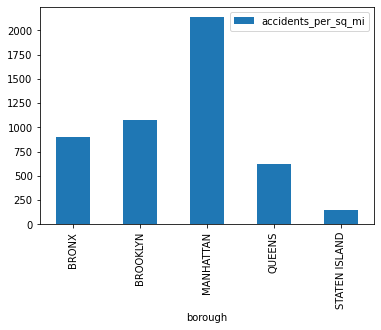

In [ ]:
borough_frame = pd.DataFrame(boroughs)
borough_frame.columns = ['count']
borough_frame['borough'] = borough_frame.index

borough_frame['accidents_per_sq_mi'] = borough_frame.apply(lambda x: x['count'] / borough_data[x['borough'].lower()]['area'], axis=1)
borough_frame.plot.bar(x='borough', y='accidents_per_sq_mi')

Al mirar el parámetro `accident_per_sq_mi`, Manhattan encabeza la lista por un amplio margen. Esto muestra claramente que aunque Brooklyn y Queens tienen más accidentes totales, Manhattan tiene una concentración mucho mayor de accidentes.

### Exercise 8 (30 min):

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Answer.**

In [ ]:
df.groupby(['BOROUGH', 'HOUR']).size()

BOROUGH        HOUR
BRONX          0       1329
               1        529
               2        402
               3        361
               4        418
                       ... 
STATEN ISLAND  19       415
               20       367
               21       268
               22       224
               23       174
Length: 120, dtype: int64

In [ ]:
df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1
df1 = df1.reset_index()
df1.head(30)

,BOROUGH,HOUR,count
0,BRONX,0,1329
1,BRONX,1,529
2,BRONX,2,402
3,BRONX,3,361
4,BRONX,4,418
5,BRONX,5,508
6,BRONX,6,835
7,BRONX,7,1406
8,BRONX,8,2341
9,BRONX,9,2162


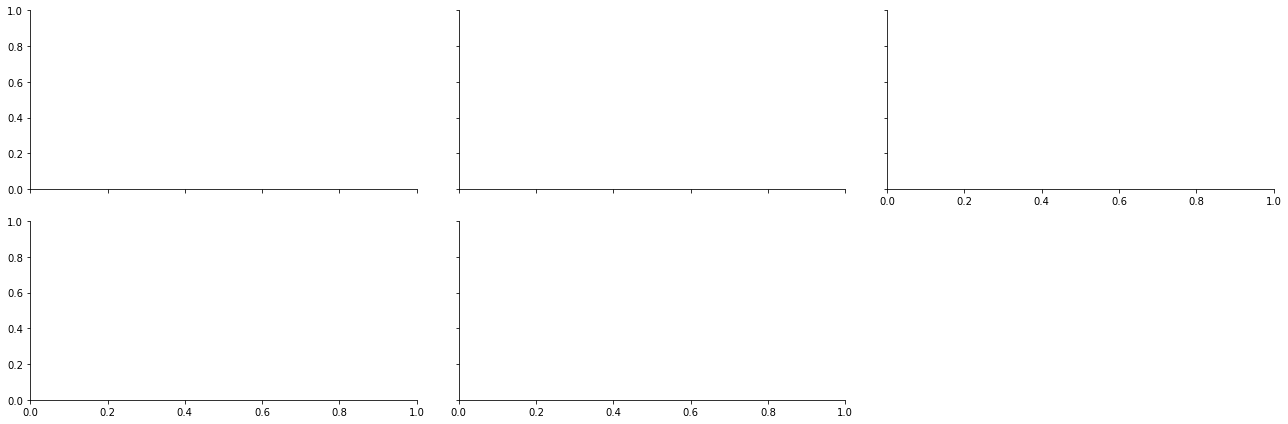

In [ ]:
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=df['BOROUGH'].unique)
chart

C:\Users\Windows\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


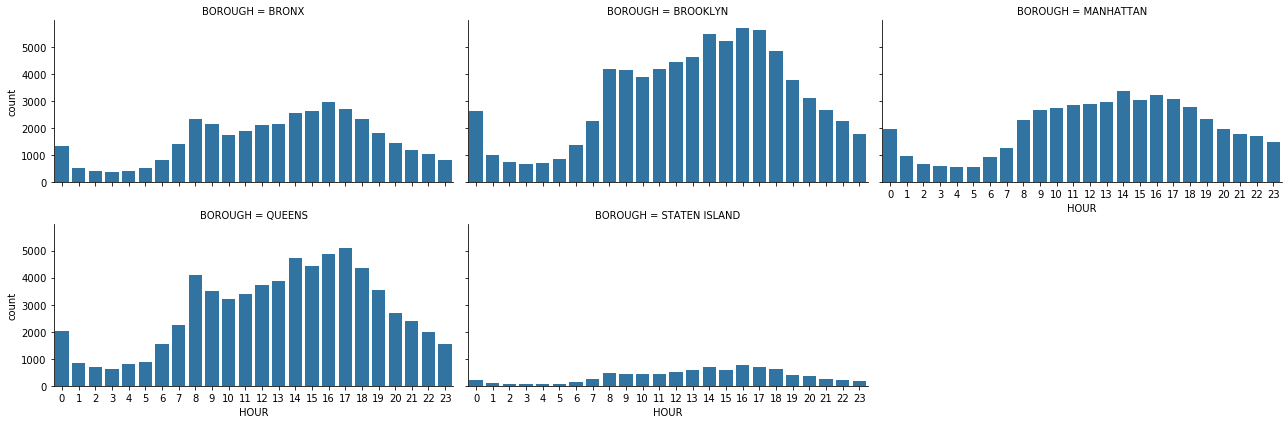

In [ ]:
df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=df['BOROUGH'].unique)
chart.map(sns.barplot, 'HOUR', 'count',)

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Podemos ver que en todos los distritos el recuento de accidentes es más alto aproximadamente entre las 2 y las 6 p.m. Pero en Manhattan y el Bronx, puede ver que no hay tanto aumento relativo durante estas horas como en Brooklyn o Queens. Además, Staten Island tiene el menor número total de accidentes.

### Exercise 9 (45 min):

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

**Answer**.

**Solution 1**

Usando la sugerencia de la pregunta

In [ ]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'HOUR', 'WEEKDAY'],
      dtype='object')

In [ ]:
columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
           'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
          'CONTRIBUTING FACTOR VEHICLE 5']
frames=[df[column].reset_index().rename(columns={column:'FACTOR'}) for column in columns]
factors_df=pd.concat(frames)
factors_df

no_rep_factors=factors_df.groupby(['index','FACTOR']).size().reset_index()
no_rep_factors

final_df=no_rep_factors.groupby(['FACTOR']).size()
type(final_df)
final_df.sort_values(ascending=False)

FACTOR
Unspecified                                              190096
Driver Inattention/Distraction                            61752
Failure to Yield Right-of-Way                             19641
Following Too Closely                                     17293
Backing Unsafely                                          14835
Passing Too Closely                                       12631
Passing or Lane Usage Improper                            11808
Other Vehicular                                            8860
Unsafe Lane Changing                                       6643
Turning Improperly                                         6626
Traffic Control Disregarded                                4687
Driver Inexperience                                        4152
Unsafe Speed                                               3469
Reaction to Uninvolved Vehicle                             3034
Alcohol Involvement                                        2491
View Obstructed/Limited          

In [ ]:
columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
           'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
          'CONTRIBUTING FACTOR VEHICLE 5']

#First, we concatenate all the corresponding columns into a big data-frame
frames=[df[column].reset_index().rename(columns={column:'FACTOR'}) for column in columns]
factors_df=pd.concat(frames)


#The reasoning behind doing reset_index() is that we can use a groupby on the indexes to delete repetitions as follows:
no_rep_factors=factors_df.groupby(['index','FACTOR']).size().reset_index()

#The data frame we are looking for is given by
final_df=no_rep_factors.groupby(['FACTOR']).size()

#Since we want to search for the most common factors of accidents, we can do the following:
final_df=final_df.sort_values(ascending=False).reset_index()
final_df.head(10)

,FACTOR,0
0,Unspecified,190096
1,Driver Inattention/Distraction,61752
2,Failure to Yield Right-of-Way,19641
3,Following Too Closely,17293
4,Backing Unsafely,14835
5,Passing Too Closely,12631
6,Passing or Lane Usage Improper,11808
7,Other Vehicular,8860
8,Unsafe Lane Changing,6643
9,Turning Improperly,6626


**Solution 2**
Dado que los datos están presentes en varias columnas (`CONTRIBUTING FACTOR VEHICLE 1 - 5`) y pueden ocurrir repeticiones, primero creemos una nueva columna con factores únicos por accidente. Después de eso, contamos el número de apariciones de cada factor en las filas.

In [ ]:
df['unique factors'] =df.apply(lambda x: set([x[column] for column in columns if x[column]]), axis=1)
factors_count = {}
for index, row in df.iterrows():
    for factor in row['unique factors']:
        count = factors_count.get(factor, 0)
        count += 1
        factors_count[factor] = count
factor_count = sorted(factors_count.items(), key=lambda x: x[1], reverse=True)

In [ ]:
factor_count[:15]

[(nan, 237730),
 ('Unspecified', 190096),
 ('Driver Inattention/Distraction', 61752),
 ('Failure to Yield Right-of-Way', 19641),
 ('Following Too Closely', 17293),
 ('Backing Unsafely', 14835),
 ('Passing Too Closely', 12631),
 ('Passing or Lane Usage Improper', 11808),
 ('Other Vehicular', 8860),
 ('Unsafe Lane Changing', 6643),
 ('Turning Improperly', 6626),
 ('Traffic Control Disregarded', 4687),
 ('Driver Inexperience', 4152),
 ('Unsafe Speed', 3469),
 ('Reaction to Uninvolved Vehicle', 3034)]

El top 5 de causas son:

1. Driver Inattention/Distraction
2. Failure to Yield Right-of-Way
3. Following Too Closely
4. Backing Unsafely 
5. Passing Too Close

### Exercise 10 (45 min):

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

**Answer.** 

In [ ]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',]

# Concatenate all corresponding frames.
frames=[df[['BOROUGH',column]].rename(columns={'BOROUGH':'BOROUGH',column:'VEHICLE'}) for column in columns]
vehicles_df=pd.concat(frames).reset_index()

#Count repetitions
no_rep_vehicles=vehicles_df.groupby(['index','BOROUGH','VEHICLE']).size().reset_index()

#Then get rid of these
final_df=no_rep_vehicles.groupby(['BOROUGH','VEHICLE']).size().sort_values(ascending=False).reset_index()

final_df.head(10)

,BOROUGH,VEHICLE,0
0,BROOKLYN,Sedan,39459
1,QUEENS,Sedan,35103
2,BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
3,QUEENS,Station Wagon/Sport Utility Vehicle,31647
4,MANHATTAN,Sedan,20727
5,BRONX,Sedan,19652
6,MANHATTAN,Station Wagon/Sport Utility Vehicle,16432
7,BRONX,Station Wagon/Sport Utility Vehicle,15434
8,BROOKLYN,PASSENGER VEHICLE,10177
9,MANHATTAN,Taxi,8989


Podemos ver que `Sedan` y `Station Wagon / Sport Utility Vehicle` son claros ganadores por causar el mayor número de accidentes, y que esto no difiere entre los condados.

### Exercise 11 (15 min):

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

**Answer.**

* La primera respuesta no es viable ya que no estamos tomando en cuenta los posibles cambios implementados por el programa Vision Zero después del primer trimestre de 2018.

* La segunda respuesta tiene más matices, ya que intenta comprender primero qué cambios podrían haber ocurrido después del primer trimestre de 2018. Luego, se concentra en áreas importantes de la ciudad y luego sugiere una visita para mejorar la comprensión de la situación.

* La tercera respuesta no es correcta. Aunque los datos proporcionados pueden no responder por completo a lo que salió mal en el primer trimestre de 2019, pueden proporcionar pistas sobre dónde buscar y evitar trabajos innecesarios.

* Tu respuesta también puede ser válida. No siempre existe un enfoque único para la comprensión de problemas como éste.

### Exercise 12 (45 min):

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

**Answer.**

In [ ]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',]

killed_columns=['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']

TOTAL=0
for column in killed_columns:
    TOTAL+=df[column].to_numpy()

TOTAL
df['TOTAL_KILLED']=pd.DataFrame(TOTAL)

deaths_df=df[columns+['TOTAL_KILLED']]
deaths_df=deaths_df[deaths_df['TOTAL_KILLED']>0]

frames=[deaths_df[['TOTAL_KILLED',column]].rename(columns={column:'VEHICLE'}) for column in columns]
vehicles_df=pd.concat(frames).reset_index()
vehicles_norep_df=vehicles_df.groupby(['index','TOTAL_KILLED','VEHICLE']).size().reset_index()
vehicles_norep_df=vehicles_norep_df[['TOTAL_KILLED','VEHICLE']]

vehicles_norep_df

final_df=vehicles_norep_df.groupby('VEHICLE').sum().sort_values(['TOTAL_KILLED'], ascending=False).reset_index()
final_df.head(10)

,VEHICLE,TOTAL_KILLED
0,Station Wagon/Sport Utility Vehicle,87
1,Sedan,65
2,Motorcycle,22
3,PASSENGER VEHICLE,21
4,SPORT UTILITY / STATION WAGON,20
5,Bike,19
6,Bus,10
7,Box Truck,8
8,Pick-up Truck,8
9,Taxi,5


In [ ]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',]

killed_columns=['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']

#Create a new column with the total of kills.
TOTAL=0
for column in killed_columns:
    TOTAL+=df[column].to_numpy()
df['TOTAL_KILLED']=pd.DataFrame(TOTAL)

#Get rid of the accidents with no deaths. This might increase efficiency in further computations.
deaths_df=df[columns+['TOTAL_KILLED']]
deaths_df=deaths_df[deaths_df['TOTAL_KILLED']>0]

#Next, we get rid of the repetitions of vehicles in a single accident
frames=[deaths_df[['TOTAL_KILLED',column]].rename(columns={column:'VEHICLE'}) for column in columns]
vehicles_df=pd.concat(frames).reset_index()
vehicles_norep_df=vehicles_df.groupby(['index','TOTAL_KILLED','VEHICLE']).size().reset_index()
vehicles_norep_df=vehicles_norep_df[['TOTAL_KILLED','VEHICLE']]

#Finally, we count the number of deaths
final_df=vehicles_norep_df.groupby('VEHICLE').sum().sort_values(['TOTAL_KILLED'], ascending=False).reset_index()
final_df.head(10)

,VEHICLE,TOTAL_KILLED
0,Station Wagon/Sport Utility Vehicle,87
1,Sedan,65
2,Motorcycle,22
3,PASSENGER VEHICLE,21
4,SPORT UTILITY / STATION WAGON,20
5,Bike,19
6,Bus,10
7,Box Truck,8
8,Pick-up Truck,8
9,Taxi,5


Observe que ```SPORT UTILITY / STATION WAGON``` es esencialmente lo mismo que ```Station Wagon / Sport Utility Vehicle```. Más adelante en el curso veremos cómo limpiar correctamente errores como este en los datos. Por ahora, omitamos este hecho y continuemos con el análisis.

[Text(0, 0, 'Station Wagon/Sport Utility Vehicle'),
 Text(0, 0, 'Sedan'),
 Text(0, 0, 'Motorcycle'),
 Text(0, 0, 'PASSENGER VEHICLE'),
 Text(0, 0, 'SPORT UTILITY / STATION WAGON')]

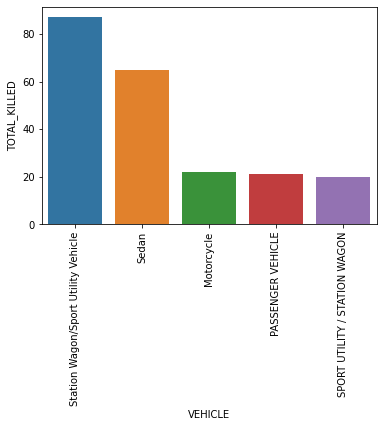

In [ ]:
#Finally, we plot the data
barplot = sns.barplot(data=final_df[:5], x='VEHICLE', y='TOTAL_KILLED')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

Parece que `Station Wagon / Sport Utility Vehicle` y `Sedan` causan la mayoría de las muertes. El primero causa 4 veces más muertes que los otros vehículos y el segundo causa 3 veces más muertes que los otros vehículos.